Understanding Convolution

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


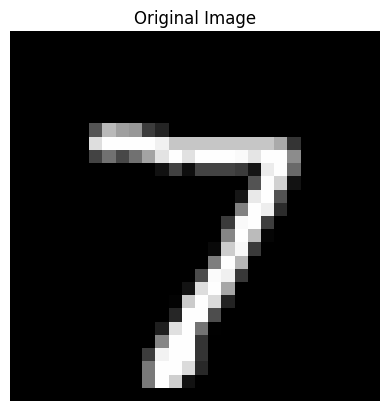

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load a single MNIST test image
(_, _), (x_test, y_test) = keras.datasets.mnist.load_data()
img = x_test[0].astype('float32') / 255.0

plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [ ]:
def conv2d_single(img, kernel, stride=1, padding=0): # manually implements convolution operation
# Slides small kernal over image, multiplying it at each point to find patterns.
    """Apply a single 2D convolution filter manually."""
    H, W = img.shape
    kH, kW = kernel.shape

    # Optional zero-padding
    if padding > 0:
        padded = np.zeros((H + 2 * padding, W + 2 * padding), dtype=img.dtype)
        padded[padding:padding + H, padding:padding + W] = img
        img = padded
        H, W = img.shape

    # Calculate output size
    outH = (H - kH) // stride + 1
    outW = (W - kW) // stride + 1
    out = np.zeros((outH, outW), dtype=np.float32)

    # Perform convolution
    for i in range(outH):
        for j in range(outW):
            region = img[i * stride:i * stride + kH, j * stride:j * stride + kW]
            out[i, j] = np.sum(region * kernel)
    return out


def maxpool2x2(x): # 2x2 regions takes maximum value, keeping important feautes with less data
    """Manual 2×2 max pooling."""
    H, W = x.shape
    out = np.zeros((H // 2, W // 2), dtype=x.dtype)
    for i in range(0, H, 2):
        for j in range(0, W, 2):
            out[i // 2, j // 2] = np.max(x[i:i + 2, j:j + 2])
    return out

In [ ]:
# Edge detection filters
edge_h = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]], dtype=np.float32)

edge_v = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]], dtype=np.float32)

# Simple blur filter
blur = (1/9.0) * np.ones((3, 3), dtype=np.float32)

Shown above are the filter matricies. All CN's learn with these kinds of filters automatically during training.

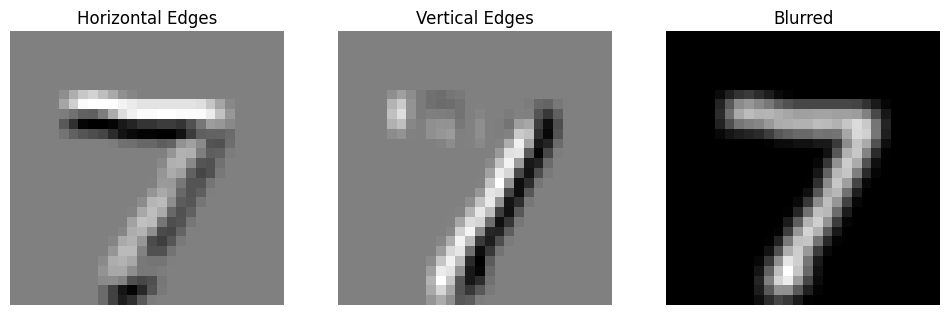

In [ ]:
feat_h = conv2d_single(img, edge_h, padding=1)
feat_v = conv2d_single(img, edge_v, padding=1)
feat_b = conv2d_single(img, blur,   padding=1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(feat_h, cmap='gray'); plt.title("Horizontal Edges"); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(feat_v, cmap='gray'); plt.title("Vertical Edges"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(feat_b, cmap='gray'); plt.title("Blurred"); plt.axis('off')
plt.show()

Shown above are the images after each convolution filter is applied: "Reading" the image

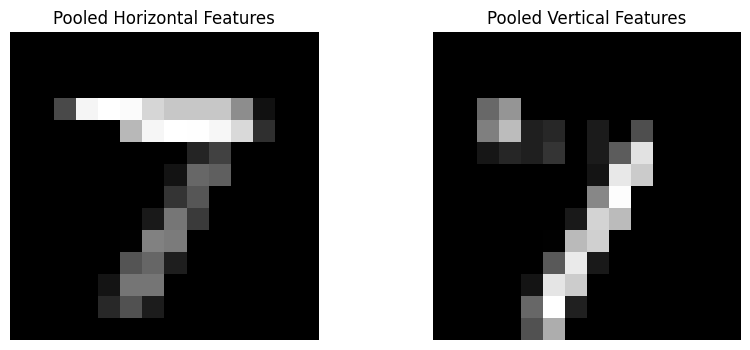

In [ ]:
pool_h = maxpool2x2(np.maximum(feat_h, 0))
pool_v = maxpool2x2(np.maximum(feat_v, 0))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.imshow(pool_h, cmap='gray'); plt.title("Pooled Horizontal Features"); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(pool_v, cmap='gray'); plt.title("Pooled Vertical Features"); plt.axis('off')
plt.show()

Keeps important featues while reducing size, essential for fast and accurate image classification.

What is shown: Convolution layers are "sliding windows" for performing matrix multiplications.

Filters detect edges, corners, shapes, or features to recognize.

Max pooling reduces spacial size, but keeps strongest signals, raising accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to html '/content/drive/MyDrive/HNR499/HNR499_Model6'

Mounted at /content/drive
[NbConvertApp] Converting notebook /content/drive/MyDrive/HNR499/HNR499_Model6 to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 330187 bytes to /content/drive/MyDrive/HNR499/HNR499_Model.html
